In [59]:
library(poLCA)

In [71]:
df <- read.csv("data/LCA_prep_data.csv")
df$admission_type <- as.factor(df$admission_type)
df$gender <- as.factor(df$gender)
df$age_bucket <- as.factor(df$age_bucket)
head(df)


,X,subject_id,admission_type,gender,age_bucket,max_age_at_admission,hadm_id,congestive_heart_failure,cardiac_arrhythmias,valvular_disease,⋯,coagulopathy,obesity,weight_loss,fluid_electrolyte,blood_loss_anemia,deficiency_anemias,alcohol_abuse,drug_abuse,psychoses,depression
,<int>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,58526,Non-elective,F,25-44,36,100001,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
2,1,54610,Non-elective,M,45-64,60,100003,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
3,2,9895,Non-elective,F,45-64,49,100006,1,2,1,⋯,1,1,1,2,1,1,1,1,1,2
4,3,23018,Non-elective,F,65-84,74,100007,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
5,4,533,Non-elective,M,45-64,61,100009,1,2,1,⋯,1,2,1,1,1,1,1,1,1,1
6,5,55853,Elective,F,45-64,55,100010,1,1,1,⋯,1,1,1,2,1,1,1,1,1,1


In [64]:
set.seed(1)
min_aic <- 1000000
min_bic <- 1000000

f <- as.formula(cbind(admission_type,gender,age_bucket,congestive_heart_failure,cardiac_arrhythmias,valvular_disease,pulmonary_circulation,peripheral_vascular,hypertension,paralysis,other_neurological,chronic_pulmonary,diabetes_uncomplicated,diabetes_complicated,hypothyroidism,renal_failure,liver_disease,peptic_ulcer,aids,lymphoma,metastatic_cancer,solid_tumor,rheumatoid_arthritis,coagulopathy,obesity,weight_loss,fluid_electrolyte,blood_loss_anemia,deficiency_anemias,alcohol_abuse,drug_abuse,psychoses,depression)~1)

for(i in 6:9){
  lc <- poLCA(f, df, nclass=i, maxiter=6000, 
              tol=1e-5, na.rm=FALSE,  
              nrep=3, verbose=TRUE, calc.se=TRUE)
  
  # Track the best BIC model
  if(lc$bic < min_bic){
    min_bic <- lc$bic
    LCA_best_model_bic <- lc
  }
  
  # Track the best AIC model
  if(lc$aic < min_aic){
    min_aic <- lc$aic
    LCA_best_model_aic <- lc
  }
}

# Display best models based on AIC and BIC
LCA_best_model_bic  # Best model by BIC
LCA_best_model_aic  # Best model by AIC


Model 1: llik = -339676.4 ... best llik = -339676.4
Model 2: llik = -339676.4 ... best llik = -339676.4
Model 3: llik = -339449.5 ... best llik = -339449.5
Conditional item response (column) probabilities,
 by outcome variable, for each class (row) 
 
$admission_type
          Elective Non-elective
class 1:    0.1355       0.8645
class 2:    0.3641       0.6359
class 3:    0.1184       0.8816
class 4:    0.0945       0.9055
class 5:    0.0914       0.9086
class 6:    0.0368       0.9632

$gender
               F      M
class 1:  0.4666 0.5334
class 2:  0.2740 0.7260
class 3:  0.4340 0.5660
class 4:  0.6165 0.3835
class 5:  0.3991 0.6009
class 6:  0.2721 0.7279

$age_bucket
           16-24  25-44  45-64  65-84  85-95
class 1:  0.0016 0.0120 0.1469 0.6977 0.1419
class 2:  0.0000 0.0411 0.4378 0.4992 0.0219
class 3:  0.0024 0.0652 0.3787 0.5192 0.0345
class 4:  0.0029 0.0499 0.3105 0.5439 0.0927
class 5:  0.1899 0.4648 0.3431 0.0022 0.0000
class 6:  0.0065 0.1931 0.6511 0.1492 0.0000

$c

Conditional item response (column) probabilities,
 by outcome variable, for each class (row) 
 
$admission_type
          Elective Non-elective
class 1:    0.3826       0.6174
class 2:    0.0452       0.9548
class 3:    0.1820       0.8180
class 4:    0.1288       0.8712
class 5:    0.2333       0.7667
class 6:    0.1615       0.8385
class 7:    0.0347       0.9653
class 8:    0.0322       0.9678
class 9:    0.1185       0.8815

$gender
               F      M
class 1:  0.1766 0.8234
class 2:  0.3525 0.6475
class 3:  0.5352 0.4648
class 4:  0.4435 0.5565
class 5:  0.9999 0.0001
class 6:  0.4842 0.5158
class 7:  0.2761 0.7239
class 8:  0.4164 0.5836
class 9:  0.4163 0.5837

$age_bucket
           16-24  25-44  45-64  65-84  85-95
class 1:  0.0000 0.0454 0.4829 0.4636 0.0082
class 2:  0.2315 0.4932 0.2753 0.0000 0.0000
class 3:  0.0207 0.1671 0.4480 0.3378 0.0264
class 4:  0.0002 0.0019 0.0739 0.7475 0.1765
class 5:  0.0023 0.0647 0.3575 0.5094 0.0660
class 6:  0.0050 0.0291 0.2621 0.614

Conditional item response (column) probabilities,
 by outcome variable, for each class (row) 
 
$admission_type
          Elective Non-elective
class 1:    0.3826       0.6174
class 2:    0.0452       0.9548
class 3:    0.1820       0.8180
class 4:    0.1288       0.8712
class 5:    0.2333       0.7667
class 6:    0.1615       0.8385
class 7:    0.0347       0.9653
class 8:    0.0322       0.9678
class 9:    0.1185       0.8815

$gender
               F      M
class 1:  0.1766 0.8234
class 2:  0.3525 0.6475
class 3:  0.5352 0.4648
class 4:  0.4435 0.5565
class 5:  0.9999 0.0001
class 6:  0.4842 0.5158
class 7:  0.2761 0.7239
class 8:  0.4164 0.5836
class 9:  0.4163 0.5837

$age_bucket
           16-24  25-44  45-64  65-84  85-95
class 1:  0.0000 0.0454 0.4829 0.4636 0.0082
class 2:  0.2315 0.4932 0.2753 0.0000 0.0000
class 3:  0.0207 0.1671 0.4480 0.3378 0.0264
class 4:  0.0002 0.0019 0.0739 0.7475 0.1765
class 5:  0.0023 0.0647 0.3575 0.5094 0.0660
class 6:  0.0050 0.0291 0.2621 0.614

In [65]:
LCA_best_model_bic

Conditional item response (column) probabilities,
 by outcome variable, for each class (row) 
 
$admission_type
          Elective Non-elective
class 1:    0.3826       0.6174
class 2:    0.0452       0.9548
class 3:    0.1820       0.8180
class 4:    0.1288       0.8712
class 5:    0.2333       0.7667
class 6:    0.1615       0.8385
class 7:    0.0347       0.9653
class 8:    0.0322       0.9678
class 9:    0.1185       0.8815

$gender
               F      M
class 1:  0.1766 0.8234
class 2:  0.3525 0.6475
class 3:  0.5352 0.4648
class 4:  0.4435 0.5565
class 5:  0.9999 0.0001
class 6:  0.4842 0.5158
class 7:  0.2761 0.7239
class 8:  0.4164 0.5836
class 9:  0.4163 0.5837

$age_bucket
           16-24  25-44  45-64  65-84  85-95
class 1:  0.0000 0.0454 0.4829 0.4636 0.0082
class 2:  0.2315 0.4932 0.2753 0.0000 0.0000
class 3:  0.0207 0.1671 0.4480 0.3378 0.0264
class 4:  0.0002 0.0019 0.0739 0.7475 0.1765
class 5:  0.0023 0.0647 0.3575 0.5094 0.0660
class 6:  0.0050 0.0291 0.2621 0.614

In [66]:
LCA_best_model_aic

Conditional item response (column) probabilities,
 by outcome variable, for each class (row) 
 
$admission_type
          Elective Non-elective
class 1:    0.3826       0.6174
class 2:    0.0452       0.9548
class 3:    0.1820       0.8180
class 4:    0.1288       0.8712
class 5:    0.2333       0.7667
class 6:    0.1615       0.8385
class 7:    0.0347       0.9653
class 8:    0.0322       0.9678
class 9:    0.1185       0.8815

$gender
               F      M
class 1:  0.1766 0.8234
class 2:  0.3525 0.6475
class 3:  0.5352 0.4648
class 4:  0.4435 0.5565
class 5:  0.9999 0.0001
class 6:  0.4842 0.5158
class 7:  0.2761 0.7239
class 8:  0.4164 0.5836
class 9:  0.4163 0.5837

$age_bucket
           16-24  25-44  45-64  65-84  85-95
class 1:  0.0000 0.0454 0.4829 0.4636 0.0082
class 2:  0.2315 0.4932 0.2753 0.0000 0.0000
class 3:  0.0207 0.1671 0.4480 0.3378 0.0264
class 4:  0.0002 0.0019 0.0739 0.7475 0.1765
class 5:  0.0023 0.0647 0.3575 0.5094 0.0660
class 6:  0.0050 0.0291 0.2621 0.614

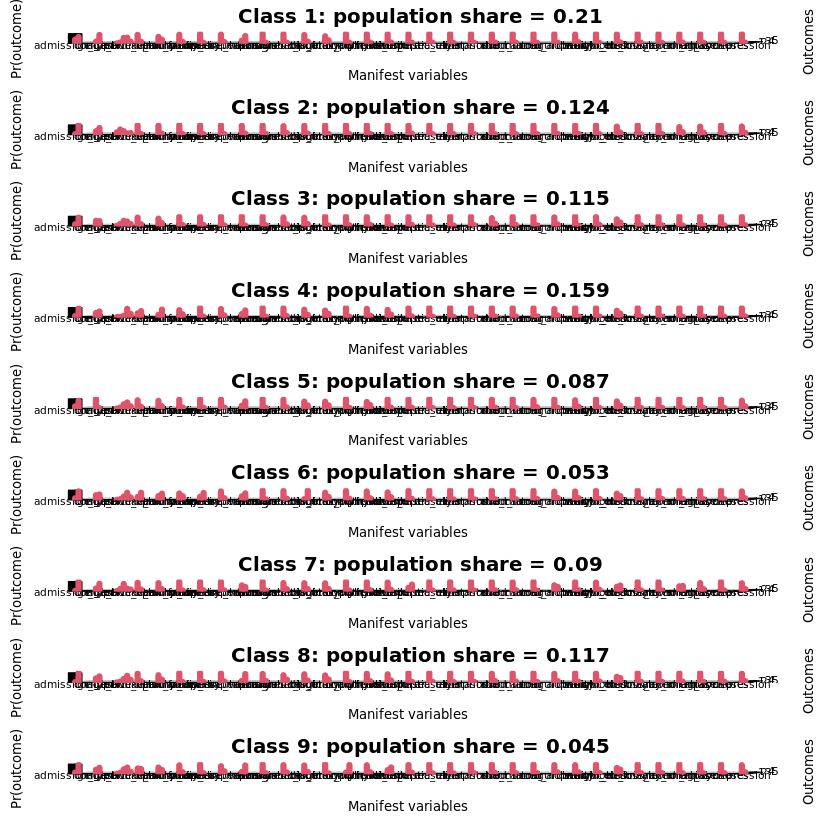

In [67]:
plot(LCA_best_model_bic)

# Check Patients fall into which Latent Classes

In [68]:
# Assign the predicted class for each observation to a new column in df
df$class_assignment <- LCA_best_model_bic$predclass

# View the updated DataFrame to check who falls into which group
head(df)

# You can also use table to summarize the number of individuals in each class
table(df$class_assignment)


,X,subject_id,admission_type,gender,age_bucket,max_age_at_admission,hadm_id,congestive_heart_failure,cardiac_arrhythmias,valvular_disease,⋯,obesity,weight_loss,fluid_electrolyte,blood_loss_anemia,deficiency_anemias,alcohol_abuse,drug_abuse,psychoses,depression,class_assignment
,<int>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,58526,Non-elective,F,25-44,36,100001,1,1,1,⋯,1,1,1,1,1,1,1,1,1,9
2,1,54610,Non-elective,M,45-64,60,100003,1,1,1,⋯,1,1,1,1,1,1,1,1,1,7
3,2,9895,Non-elective,F,45-64,49,100006,1,2,1,⋯,1,1,2,1,1,1,1,1,2,3
4,3,23018,Non-elective,F,65-84,74,100007,1,1,1,⋯,1,1,1,1,1,1,1,1,1,5
5,4,533,Non-elective,M,45-64,61,100009,1,2,1,⋯,2,1,1,1,1,1,1,1,1,1
6,5,55853,Elective,F,45-64,55,100010,1,1,1,⋯,1,1,2,1,1,1,1,1,1,3



   1    2    3    4    5    6    7    8    9 
7202 4429 4446 5484 2823 1528 2795 3165 1462 

In [69]:
write.csv(df,"data/LCA_latent_class_data.csv",row.names = FALSE)